### HOUSING PRICE PREDICTION (kaggle competition)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# to read the data from csv
data=pd.read_csv(r"C:\Users\User\Desktop\PRATICES\COMPETITION_FORECASTING_HOUSINGPRICE\train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
#getting the data column info

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#dropping ccolumns which are not in numerical value or many null value 
data.drop(columns=["Alley","PoolQC","Fence","MiscFeature","FireplaceQu","MasVnrType","SaleCondition","SaleType","PavedDrive","GarageFinish","GarageType","LotFrontage","GarageYrBlt","MasVnrArea"],inplace=True)

In [5]:
data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,366,0,112,0,0,0,0,4,2010,142125


In [6]:
#to select the columns with numeric data
data_numeric=data.select_dtypes(include=["float64","int64"])
data_numeric

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [7]:
data_numeric.shape

(1460, 35)

In [8]:
data_numeric.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [9]:
data_numeric.shape
data_numeric.drop(columns="Id",inplace=True)

### Data Exploration 

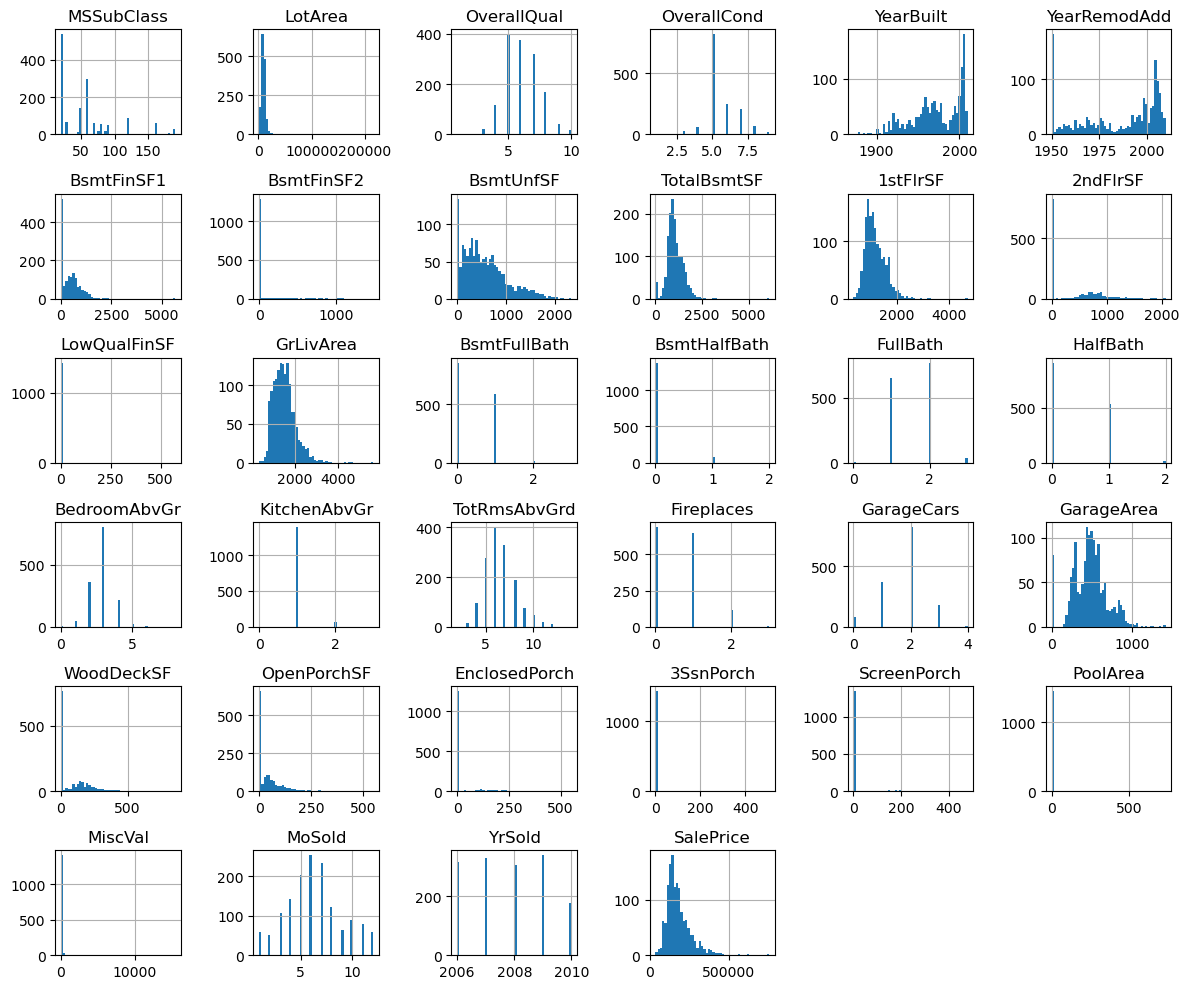

In [10]:
#plot distributions for all the numeric data

data_numeric.hist(figsize=(12,10),bins=50,xlabelsize=10,ylabelsize=10)

plt.tight_layout()
plt.show()


The number of housing built spikes after 2000 . Most of  area attributes are right skewed,that mean there is small number of housing that have an extremely big built-up area than most of other house. It explains the Sales Price distribution histrogram .  Overall Quality of the house are rated mostly from medium 5 to 8 . From the year sold,the dataset is dated back to 2006 to 2010. 

In [11]:
#calculate the correlation matrix for the numeric data

corr_matrix=data_numeric.corr()
corr_matrix

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


<Axes: >

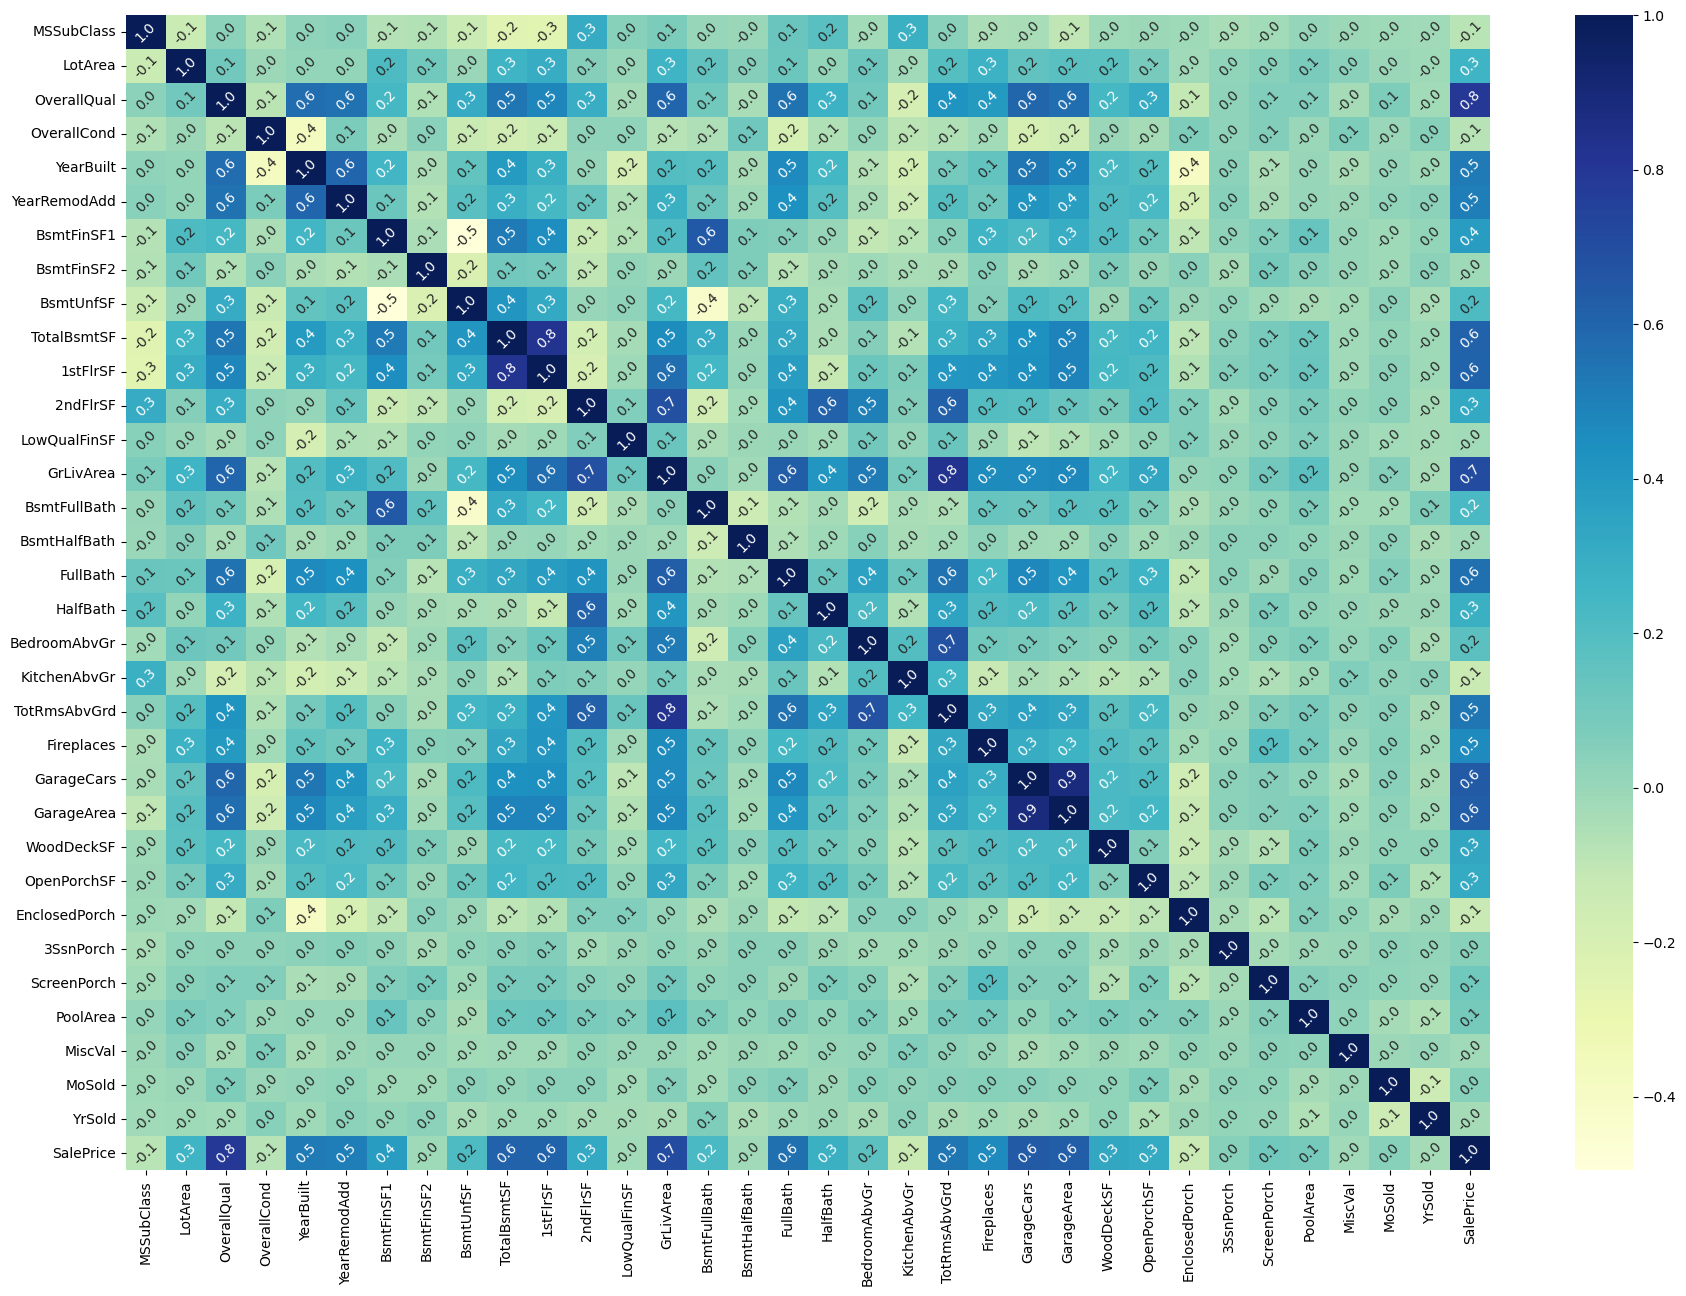

In [12]:
#plot heapmat to display relationship

plt.figure(figsize=(22,15))
sns.heatmap(data=corr_matrix, annot=True,cmap="YlGnBu",annot_kws={"rotation":45}, fmt=".1f")


Overall material and finish quality(OverallQual) and Sales Price has a high correlation of 0.8\
GrLivArea: Above grade (ground) living area square feet and Sales price corr = 0.7

The belows has a corr of 0.6 with sales price:\
1.TotalBsmtSF: Total square feet of basement area\
2.1stFlrSF: First Floor square feet\
3.FullBath: Full bathrooms above grade\
4.GarageCars: Size of garage in car capacity\
5.GarageArea: Size of garage in square feet\
\
The below has a median corr of 0.5 with sales price\
1.YearBuilt: Original construction date\
2.YearRemodAdd: Remodel date\
3.TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)\
4.Fireplaces: Number of fireplaces

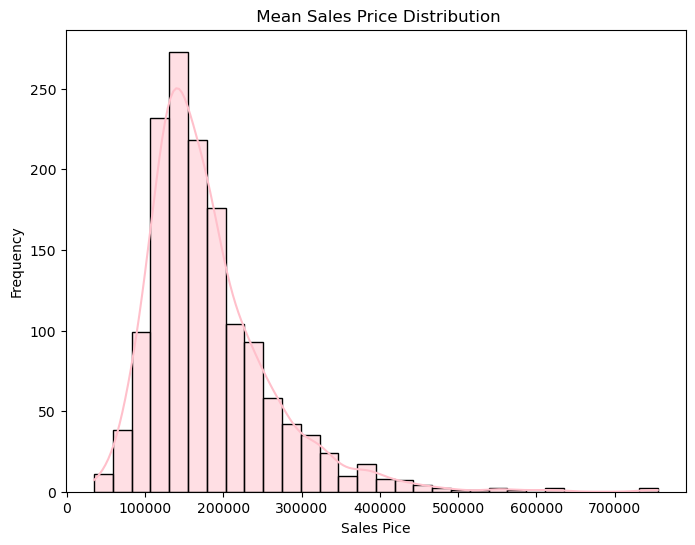

In [13]:
plt.figure(figsize=(8,6))
sns.histplot((data_numeric["SalePrice"]), bins=30,kde=True,color="pink")
plt.title(" Mean Sales Price Distribution")
plt.xlabel("Sales Pice")
plt.ylabel("Frequency")
plt.show()

### Sales Price Distribution 

In [14]:
data_numeric["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

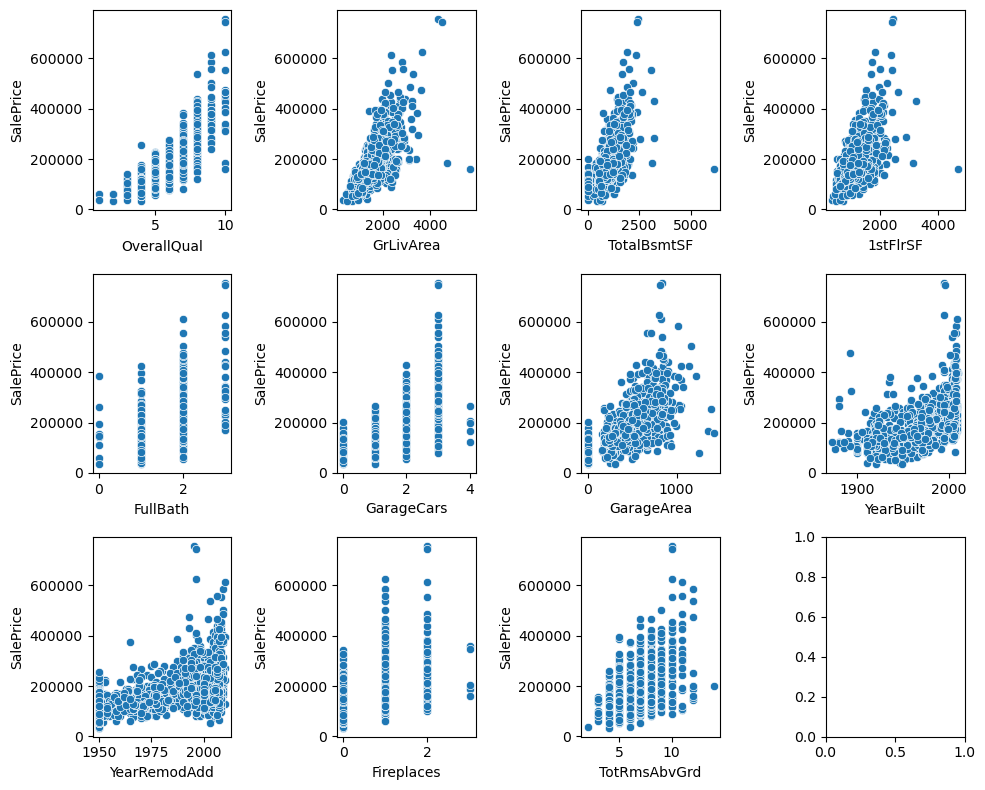

In [15]:
fig,axes=plt.subplots(3,4,figsize=(10,8))
sns.scatterplot(data=data_numeric, x="OverallQual",y="SalePrice", ax=axes[0,0])
sns.scatterplot(data=data_numeric, x="GrLivArea",y="SalePrice", ax=axes[0,1])
sns.scatterplot(data=data_numeric, x="TotalBsmtSF",y="SalePrice", ax=axes[0,2])
sns.scatterplot(data=data_numeric, x="1stFlrSF",y="SalePrice", ax=axes[0,3])
sns.scatterplot(data=data_numeric, x="FullBath",y="SalePrice", ax=axes[1,0])
sns.scatterplot(data=data_numeric, x="GarageCars",y="SalePrice", ax=axes[1,1])
sns.scatterplot(data=data_numeric, x="GarageArea",y="SalePrice", ax=axes[1,2])
sns.scatterplot(data=data_numeric, x="YearBuilt",y="SalePrice", ax=axes[1,3])
sns.scatterplot(data=data_numeric, x="YearRemodAdd",y="SalePrice", ax=axes[2,0])
sns.scatterplot(data=data_numeric, x="Fireplaces",y="SalePrice", ax=axes[2,1])
sns.scatterplot(data=data_numeric, x="TotRmsAbvGrd",y="SalePrice", ax=axes[2,2])

plt.tight_layout()
plt.show()

### Model Selection : Linear Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#features 

X =data_numeric.drop(["SalePrice"],axis=1)
y=data_numeric["SalePrice"]

In [17]:
#split training and testing data set

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
#create and train the Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
#make prediction to the test set
y_predict=lr.predict(x_test)

In [20]:
lr.score(x_test,y_test)

0.8184946026286711

### Model : Random Forest Regression 

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [22]:
forest=RandomForestRegressor()

In [23]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
y_predict2=forest.predict(x_test)

In [25]:
forest.score(x_test,y_test)

0.895158142599484

In [26]:
from sklearn.metrics import mean_squared_error,r2_score


In [27]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_predict2.shape}")

# Check for NaN or infinite values
if np.any(np.isnan(y_test)) or np.any(np.isnan(y_predict2)):
    raise ValueError("NaN values found in the data.")
if np.any(np.isinf(y_test)) or np.any(np.isinf(y_predict2)):
    raise ValueError("Infinite values found in the data.")

# Ensure y_test and y_pred are 1-dimensional
y_test = y_test.ravel()
y_pred = y_predict2.ravel()

Shape of y_test: (292,)
Shape of y_pred: (292,)


In [28]:
mse=mean_squared_error(y_test,y_predict2)
rmse=np.sqrt(mse)
r=r2_score(y_test,y_predict2)

print(f" Mean Squared Error :", mse)
print(f" Root Mean Squared Error :", rmse)
print(f" R score:", r)


 Mean Squared Error : 804171246.4293531
 Root Mean Squared Error : 28357.913294693477
 R score: 0.895158142599484


### Model :Gradient Boosting Regressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
Gbr=GradientBoostingRegressor()
Gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [31]:
y_predict3=Gbr.predict(x_test)

In [32]:
mse=mean_squared_error(y_test,y_predict3)
rmse=np.sqrt(mse)
r=r2_score(y_test,y_predict3)

print(f" Mean Squared Error :", mse)
print(f" Root Mean Squared Error :", rmse)
print(f" R score:", r)


 Mean Squared Error : 871917824.3819638
 Root Mean Squared Error : 29528.25467889973
 R score: 0.8863258483628801


### Predict the Test data 

In [33]:
test_df=pd.read_csv(r"C:\Users\User\Desktop\PRATICES\COMPETITION_FORECASTING_HOUSINGPRICE\test.csv")

test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [34]:
test_idx=test_df["Id"]

X_test=test_df.drop(["Id","Alley","PoolQC","Fence","MiscFeature","FireplaceQu","MasVnrType","SaleCondition","SaleType","PavedDrive","GarageFinish","GarageType","LotFrontage","GarageYrBlt","MasVnrArea"],axis=1)

In [35]:
X_test_numeric=X_test.select_dtypes(include=["float64","int64"])
X_test_numeric.shape

(1459, 33)

In [36]:
X_test_numeric.isnull().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       1
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [37]:
#import sklearn.simpleimputer to fill the missing value with the mean value of the respective columns

from sklearn.impute import SimpleImputer

#initiate the SimpleImputer with strategy "mean"

imputer=SimpleImputer(strategy="mean")

In [38]:
#fit the imputer and transform the x-test dataset

X_test_impute=pd.DataFrame(imputer.fit_transform(X_test_numeric),columns=X_test_numeric.columns)



In [39]:
X_test_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   LotArea        1459 non-null   float64
 2   OverallQual    1459 non-null   float64
 3   OverallCond    1459 non-null   float64
 4   YearBuilt      1459 non-null   float64
 5   YearRemodAdd   1459 non-null   float64
 6   BsmtFinSF1     1459 non-null   float64
 7   BsmtFinSF2     1459 non-null   float64
 8   BsmtUnfSF      1459 non-null   float64
 9   TotalBsmtSF    1459 non-null   float64
 10  1stFlrSF       1459 non-null   float64
 11  2ndFlrSF       1459 non-null   float64
 12  LowQualFinSF   1459 non-null   float64
 13  GrLivArea      1459 non-null   float64
 14  BsmtFullBath   1459 non-null   float64
 15  BsmtHalfBath   1459 non-null   float64
 16  FullBath       1459 non-null   float64
 17  HalfBath       1459 non-null   float64
 18  BedroomA

In [40]:
#make prediction to X_test data with Ramdom forest regression 

forest_pred=forest.predict(X_test_impute)



In [41]:
#convert test_idx from pandas series to list

forest_pred=forest_pred.tolist()


In [42]:
data={"Id":test_idx, "SalePrice ": forest_pred}


In [43]:
#convert the prediction dictionary into dataframe
house_price=pd.DataFrame.from_dict(data)

In [45]:
#save the prediction result to excel file 
house_price.to_excel("submission.xlsx",index=False)